In [139]:
using SymPy

# Tarea 7 Adán Rubiol


In [140]:
f=symbols("f")
function metodo_simpson(f,a,b,n) 
    x = a
    I = 0
    dn=(b-a) / n
    while x < b
        x = x + dn
        I += (b - a) * (f(x) + 4 * f(x + dn/2) + f(x + dn))/ 6n
    end
   return I #Se regresa el valor de la integral.
end

metodo_simpson (generic function with 1 method)

In [142]:
metodo_simpson(cos,0,pi/2,10000)

0.9998429080308678

Ejercicio 4.1

In [143]:
function Lagrange(listx,listy)#Creamos la función que toma como entradas una lista de elementos xk y elementos en yk de una función.
    function Lagrangeinterpolador(x) #se define una función que servirá como la función interpoladora 
        num = length(x)#Aqui el número de elementos en x a evaluar
        num == 1 ? output = 0 : output = zeros(num) #creamos una lista de zeros que serán ocupados para el método de interpolación
        for k = 1:num  #Este for es para los elementos que queremos interpolar
            N = length(listx)#Asignamos a N el número de elementos en listx
            PolinomiosdeLagrange = ones(N)#Para poder hacer el producto  con cada elemento de listx creamos N unos
            for i in 1:N   #Este for es para el numero de elementos en listx
                for j in [1:i-1;i+1:N]     
                    PolinomiosdeLagrange[i] = PolinomiosdeLagrange[i].*(x[k]-listx[j])./(listx[i]-listx[j])
                end #Aqui calculamos la base de los polinomios  de lagrange
            end
            num == 1 ? output = sum(PolinomiosdeLagrange.*listy) : output[k] = sum(PolinomiosdeLagrange.*listy) #en esta parter calculamos la interpolación polinomial en forma de producto.
        end
        return output # a la salida de la función Lagrangeinterpolador pedimos la interpolacion polinomial
    end
    return Lagrangeinterpolador # a la salida de la función Lagrange pedimos la función interpoladora
end

Lagrange (generic function with 1 method)

In [144]:
interpolantfunc=Lagrange([1.0,2.0,4.0,6.0],[1.0,4.0,16.0,36.0])#interpolamos la función x^2 dando los elementos de la lista xk y yk

(::Lagrangeinterpolador) (generic function with 1 method)

In [145]:
interpolantfunc(6)#calculamos el valor para un punto dentro del intervalo y vemos que funciona

36.0

In [146]:
#Ahora hacemos el ejercicio que se pide en la tarea con la función cos(x)
x=linspace(0,2pi,10);#tomamos el arreglo de 10 puntos distribuidos uniformemente de (0,2pi)
y=cos.(x) #evaluamos el coseno en los elementos de la lista anterior

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [147]:
using PyPlot

In [148]:
interpolantfunc=Lagrange(x,y)#definimos la funcion interpoladora cuyas entradas son las listas anteriores

(::Lagrangeinterpolador) (generic function with 1 method)

In [149]:
interpolantfunc(pi) #probamos la funcion interpoladora para el punto x=pi cuyo coseno se aproxima a -1 como debe ser

-0.9999943253023464

In [150]:
z=interpolantfunc.(x)#creamos otra arreglo de numeros definidos como la funcion interpoladora evaluda en la lista x

10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

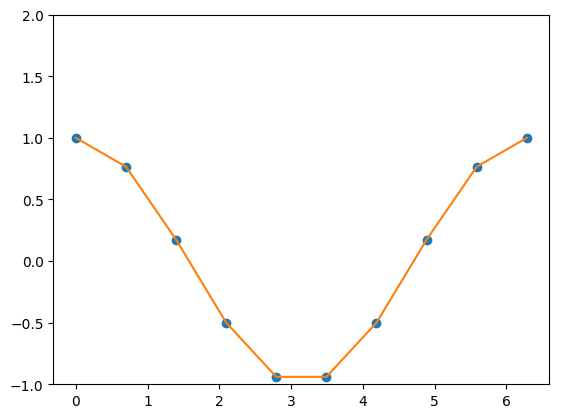

In [151]:
plot(x,y,"o")
plot(x,z)
ylim(-1,2)
show();

In [103]:
#Se hace lo mismo pero con la función cos^2(x)

In [104]:
x=linspace(0,2pi,20);#tomamos el arreglo de 10 puntos distribuidos uniformemente de (0,2pi)


In [105]:
square(x) = x^2


square (generic function with 1 method)

In [106]:
w=square.(cos.(x))

20-element Array{Float64,1}:
 1.0       
 0.89457   
 0.622743  
 0.299152  
 0.0602631 
 0.00681935
 0.161359  
 0.45871   
 0.773474  
 0.972909  
 0.972909  
 0.773474  
 0.45871   
 0.161359  
 0.00681935
 0.0602631 
 0.299152  
 0.622743  
 0.89457   
 1.0       

In [107]:
interpolantfunc2=Lagrange(x,w)

(::Lagrangeinterpolador) (generic function with 1 method)

In [108]:
Y=interpolantfunc2.(x)

20-element Array{Float64,1}:
 1.0       
 0.89457   
 0.622743  
 0.299152  
 0.0602631 
 0.00681935
 0.161359  
 0.45871   
 0.773474  
 0.972909  
 0.972909  
 0.773474  
 0.45871   
 0.161359  
 0.00681935
 0.0602631 
 0.299152  
 0.622743  
 0.89457   
 1.0       

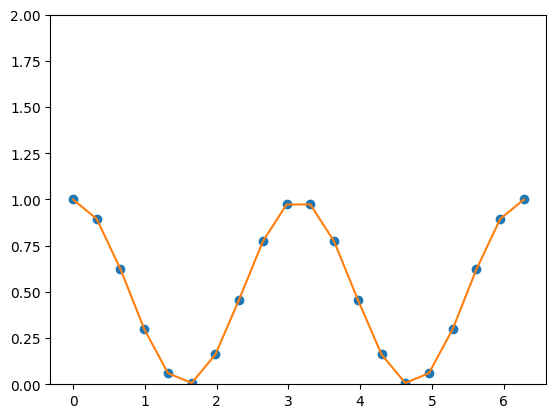

In [109]:
plot(x,w,"o")
plot(x,Y)
ylim(0,2)
show();

Ejercicio 4.2

Interpolaremos los siguientes puntos  [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]

In [110]:
#Para ello creamos las siguientes listas
listax=[0,2,3,4,5,6,7]
listay=[10,-10,-4,0,5,20,-1]


7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

In [111]:
interpolantfunc3=Lagrange(listax,listay)

(::Lagrangeinterpolador) (generic function with 1 method)

In [126]:
Z=interpolantfunc3(listax)

7-element Array{Float64,1}:
  10.0
 -10.0
  -4.0
   0.0
   5.0
  20.0
  -1.0

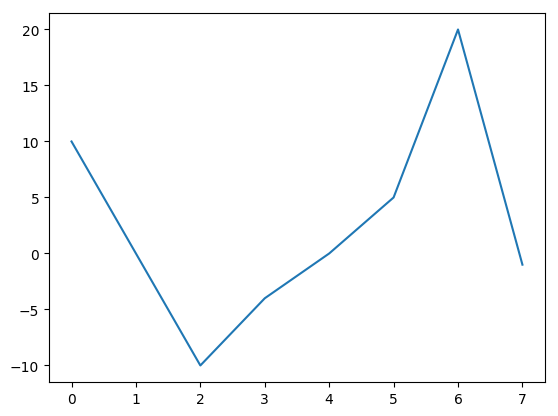

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc2c933fb10>

In [128]:
plot(listax,Z,)


In [5]:
function trapecio(f,a,b,n) #Creamos una función que toma como entrada la función f, el intervalo (a,b) y la cantidad de diferencias finitas n
    x=a # Se toma como primer valor la variable a
    I=0 # Iniciamos  el valor de la integral en cero 
    dn=(b-a)/n # definimos el tamaño de la diferencia finita      
    for n<100000
        n += 1
    while x<b
         #damos la condición de iteración hata valores menores que b
        x=x+dn #iteramos en caca punto del intervalo
        I += (b-a)*(f(x)+f(x+dn))/2n
        n += 1 #Se define la iteración en la integral dada por el método del rectángulo
        
    end
        list[i]=I
    end
    
   return list  #Se regresa el valor de la integral
end

LoadError: [91msyntax: invalid iteration specification[39m

In [160]:
trapecio(-sin,0,2pi,10)

LoadError: [91mMethodError: no method matching -(::Base.#sin)[0m
Closest candidates are:
  -([91m::Bool[39m, [91m::Complex{Bool}[39m) at complex.jl:234
  -([91m::Bool[39m, [91m::Bool[39m) at bool.jl:90
  -([91m::Bool[39m) at bool.jl:87
  ...[39m